In [16]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt


In [17]:
img = cv2.imread("data/male/male_000000.jpg")
cv2.imshow("Image", img)
cv2.waitKey(1)  # waits until a key is pressed . if other value put then it waits for that milliseconds only then the next code line will be executed
cv2.destroyAllWindows()

In [18]:
haar = cv2.CascadeClassifier("model/haarcascade_frontalface_default.xml")

In [19]:
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

In [20]:
face_rect = haar.detectMultiScale(gray)
print(face_rect)

[[ 87  53 196 196]]


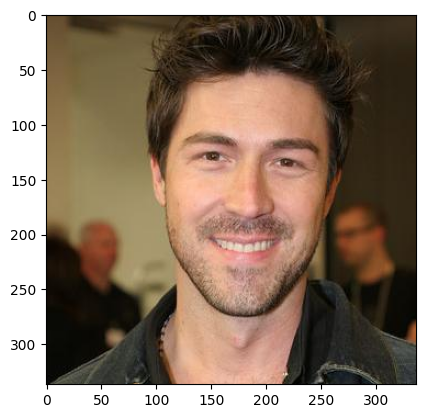

In [21]:
from cv2 import cvtColor


img_rgb = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

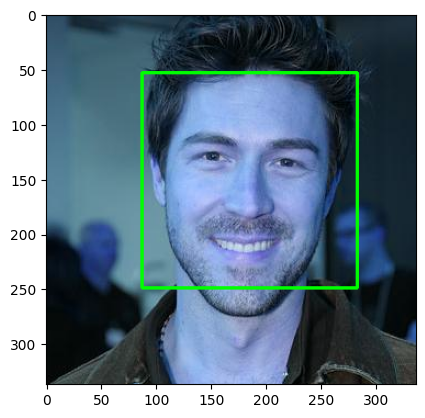

In [22]:
for x , y , w , h in face_rect:
    cv2.rectangle(img , (x,y) , (x+w , y+h) , (0,255,0) , 2)
    

plt.imshow(img)
plt.show()

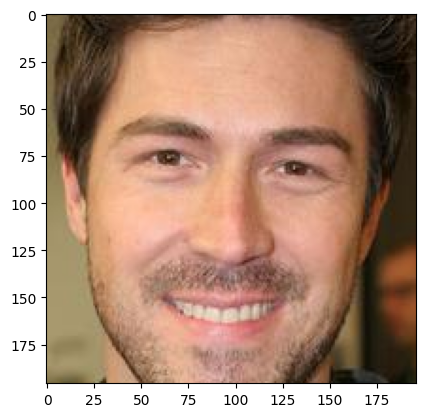

In [23]:
# cropping the face 

for x , y , w , h in face_rect :
    # cv2.rectangle(img_rgb , (x,y) , (x+w , y+h) , (0,255 ,0) , 2)
    roi = img_rgb[y:y+h , x : x+w]
    plt.imshow(roi)
    plt.show()    

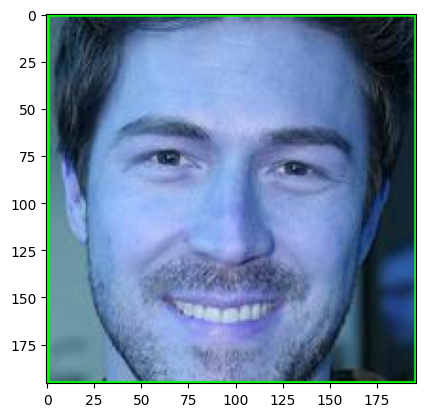

In [24]:
for x , y , w , h in face_rect:
    roi = img[y:y+h , x : x+w]
    plt.imshow(roi)
    

In [25]:
# cropping the faces from all the images 
from glob import glob 

fpath = glob("./data/female/*.jpg")
mpath = glob("./data/male/*.jpg")

print(f"The number of female images are {len(fpath)}")
print(f"The number of male images are {len(mpath)}")

The number of female images are 4762
The number of male images are 5399


In [26]:
import os
os.makedirs("cropped_data")

In [27]:
os.makedirs("./cropped_data/male")
os.makedirs("./cropped_data/female")

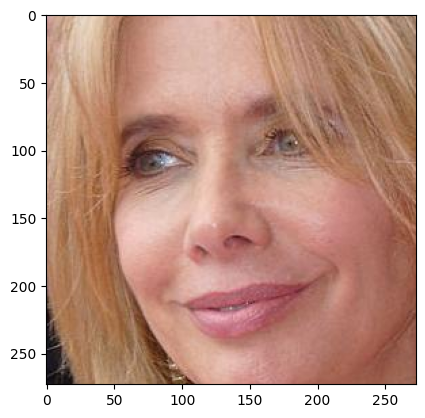

In [28]:
img = cv2.imread(fpath[0])
img_rgb = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.imshow(img_rgb)
faces = haar.detectMultiScale(gray , scaleFactor = 1.5 , minNeighbors=5)
for x , y , w  ,h in faces :
    roi = img_rgb[y:y+h , x:x+w]
    plt.imshow(roi)
    plt.show()

In [29]:
# cropping all the female images and saving them in cropped_data/female/

for i in range(len(fpath)):
    img = cv2.imread(fpath[i]) #BGR 
    img_rgb = cv2.cvtColor(img , cv2.COLOR_BGR2RGB) # BGR
    gray = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)

    faces = haar.detectMultiScale(gray , scaleFactor=1.5 , minNeighbors=5)
    for x , y , w , h in faces :
        roi = img[y:y+h , x:x+w] # img used because imwrite function expects a img in bgr format 
        cv2.imwrite(f"./cropped_data/female/female_{i}.jpg" , roi)
    




In [30]:
for i in range(len(mpath)):
    img = cv2.imread(mpath[i]) #BGR 
    img_rgb = cv2.cvtColor(img , cv2.COLOR_BGR2RGB) # BGR
    gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
    faces = haar.detectMultiScale(gray , scaleFactor = 1.5 , minNeighbors = 5)
    for x , y , w , h in faces :
        roi = img[y:y+h , x:x+w]
        cv2.imwrite(f"./cropped_data/male/male_{i}.jpg" , roi)

In [31]:
fpath = glob("./cropped_data/female/*.jpg")
mpath = glob("./cropped_data/male/*.jpg")

print(f"The number of female faces detected are {len(fpath)}.")
print(f"The number of male faces detected are {len(mpath)}.")

The number of female faces detected are 2586.
The number of male faces detected are 2316.


WE HAVE SUCCESSFULLY COMPLETED THE CROPPING OF THE FACE IMAGES FOR BOTH MALES AND FEMALES.
